In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel("CS2_37_1_18_11.xlsx")
df

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,30.000893,2011-01-10 11:47:49,30.000893,1,1,0.000000,3.784573,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
1,2,60.016021,2011-01-10 11:48:19,60.016022,1,1,0.000000,3.784411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
2,3,90.031189,2011-01-10 11:48:49,90.031189,1,1,0.000000,3.784573,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0,0,0
3,4,120.014435,2011-01-10 11:49:19,120.014436,1,1,0.000000,3.784411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0
4,5,150.014971,2011-01-10 11:49:49,30.000125,2,1,0.549928,3.883654,0.004583,0.000000,0.017754,0.000000,0.000454,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,9867,406644.639941,2011-01-15 04:45:44,1724.908014,7,50,-1.099793,2.785981,29.873788,29.806971,121.841009,105.068971,-0.004605,0.112904,0,0,0
9867,9868,406658.967809,2011-01-15 04:45:58,1739.235881,7,50,-1.099793,2.699549,29.873788,29.811348,121.841009,105.080979,-0.004930,0.112904,0,0,0
9868,9869,406718.982316,2011-01-15 04:46:58,60.014598,8,50,0.000000,3.671708,29.873788,29.811348,121.841009,105.080979,0.001103,0.112904,0,0,0
9869,9870,406719.186410,2011-01-15 04:46:59,0.203150,9,50,0.000683,3.671708,29.873788,29.811348,121.841009,105.080979,0.000000,0.109854,0,0,0


Test_Time(s): The time in seconds since the start of the battery test. It represents how long the battery has been undergoing the testing process.

Date_Time: The date and time stamp when the specific data point was recorded. It provides the chronological timing of the battery measurements.

Step_Time(s): The time in seconds that has passed since the start of the current step within the battery test. It helps track the duration of individual steps during the testing process.

Step_Index: A numerical index that represents the specific step within the battery test. Each step could involve different conditions or operations applied to the battery.

Cycle_Index: A numerical index that represents the specific cycle of the battery test. A cycle typically refers to one complete charge and discharge cycle of the battery.

Current(A): The electric current in Amperes (A) that is either flowing into the battery during charging or flowing out of the battery during discharging. It's a measure of the rate of electron flow.

Voltage(V): The electric potential difference in Volts (V) across the battery's terminals. It represents the battery's electrical energy per unit charge.

Charge_Capacity(Ah): The capacity of the battery during the charging process, measured in Ampere-hours (Ah). It indicates the amount of charge the battery can store when charging.

Discharge_Capacity(Ah): The capacity of the battery during the discharging process, also measured in Ampere-hours (Ah). It shows the amount of charge the battery can deliver when discharging.

Charge_Energy(Wh): The energy consumed or produced during the charging process, measured in Watt-hours (Wh). It represents the amount of electrical energy stored in the battery.

Discharge_Energy(Wh): The energy consumed or produced during the discharging process, also measured in Watt-hours (Wh). It represents the amount of electrical energy released from the battery.

dV/dt(V/s): The rate of change of voltage with respect to time, often expressed in Volts per second (V/s). It gives insights into the battery's voltage behavior over time.

Internal_Resistance(Ohm): The internal resistance of the battery, measured in Ohms (Ω). It represents the opposition to the flow of electric current within the battery itself.

In [3]:
df.shape

(9871, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data_Point                9871 non-null   int64         
 1   Test_Time(s)              9871 non-null   float64       
 2   Date_Time                 9871 non-null   datetime64[ns]
 3   Step_Time(s)              9871 non-null   float64       
 4   Step_Index                9871 non-null   int64         
 5   Cycle_Index               9871 non-null   int64         
 6   Current(A)                9871 non-null   float64       
 7   Voltage(V)                9871 non-null   float64       
 8   Charge_Capacity(Ah)       9871 non-null   float64       
 9   Discharge_Capacity(Ah)    9871 non-null   float64       
 10  Charge_Energy(Wh)         9871 non-null   float64       
 11  Discharge_Energy(Wh)      9871 non-null   float64       
 12  dV/dt(V/s)          

In [5]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"{column} : {unique_values}")

Data_Point : 9871
Test_Time(s) : 9871
Date_Time : 9747
Step_Time(s) : 9862
Step_Index : 9
Cycle_Index : 50
Current(A) : 875
Voltage(V) : 4213
Charge_Capacity(Ah) : 6021
Discharge_Capacity(Ah) : 3310
Charge_Energy(Wh) : 6021
Discharge_Energy(Wh) : 3310
dV/dt(V/s) : 311
Internal_Resistance(Ohm) : 38
Is_FC_Data : 1
AC_Impedance(Ohm) : 1
ACI_Phase_Angle(Deg) : 1


In [6]:
df.isnull().sum()

Data_Point                  0
Test_Time(s)                0
Date_Time                   0
Step_Time(s)                0
Step_Index                  0
Cycle_Index                 0
Current(A)                  0
Voltage(V)                  0
Charge_Capacity(Ah)         0
Discharge_Capacity(Ah)      0
Charge_Energy(Wh)           0
Discharge_Energy(Wh)        0
dV/dt(V/s)                  0
Internal_Resistance(Ohm)    0
Is_FC_Data                  0
AC_Impedance(Ohm)           0
ACI_Phase_Angle(Deg)        0
dtype: int64

In [7]:
df.describe()

,Data_Point,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
count,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000,9871.0,9871.0,9871.0
mean,4936.000000,199847.717214,1114.281919,4.043967,24.632155,-0.045777,3.869330,14.987957,14.692491,61.027260,51.962594,-0.000138,0.107539,0.0,0.0,0.0
std,2849.656587,117561.829512,853.834499,2.354648,14.335548,0.764966,0.309635,8.624521,8.617526,35.175824,30.397132,0.000674,0.012827,0.0,0.0,0.0
min,1.000000,30.000893,0.000003,1.000000,1.000000,-1.100155,2.699549,0.000000,0.000000,0.000000,0.000000,-0.006973,0.000000,0.0,0.0,0.0
25%,2468.500000,98973.791582,330.166705,2.000000,12.000000,-1.099613,3.639844,7.626214,7.079069,31.009880,25.121489,-0.000195,0.107510,0.0,0.0,0.0
50%,4936.000000,199520.217806,1020.515436,2.000000,24.000000,0.549747,3.977383,15.100621,14.480690,61.451507,51.299864,0.000032,0.109040,0.0,0.0,0.0
75%,7403.500000,300486.514831,1740.876685,7.000000,37.000000,0.549928,4.110518,22.448194,22.129053,91.423412,78.221746,0.000097,0.109953,0.0,0.0,0.0
max,9871.000000,406723.998691,3491.961525,9.000000,50.000000,1.153916,4.200842,29.873790,29.811348,121.841017,105.080979,0.001654,0.113819,0.0,0.0,0.0


In [8]:
# Dropping unnecessary columns
df_modify = df.drop(['Is_FC_Data', 'AC_Impedance(Ohm)', 'ACI_Phase_Angle(Deg)'], axis=1)

In [9]:
df_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data_Point                9871 non-null   int64         
 1   Test_Time(s)              9871 non-null   float64       
 2   Date_Time                 9871 non-null   datetime64[ns]
 3   Step_Time(s)              9871 non-null   float64       
 4   Step_Index                9871 non-null   int64         
 5   Cycle_Index               9871 non-null   int64         
 6   Current(A)                9871 non-null   float64       
 7   Voltage(V)                9871 non-null   float64       
 8   Charge_Capacity(Ah)       9871 non-null   float64       
 9   Discharge_Capacity(Ah)    9871 non-null   float64       
 10  Charge_Energy(Wh)         9871 non-null   float64       
 11  Discharge_Energy(Wh)      9871 non-null   float64       
 12  dV/dt(V/s)          

### Health status

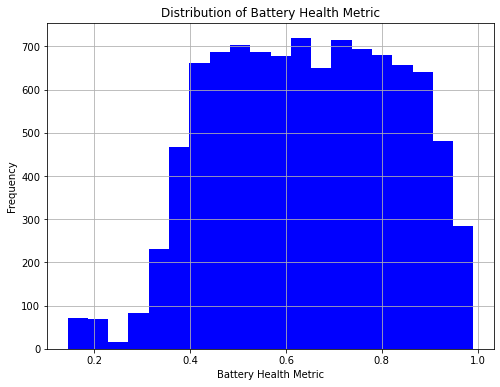

In [10]:
features = ['Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Internal_Resistance(Ohm)', 'Voltage(V)']

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df_modify[features])

# Define weights for each feature
weights = [0.3, 0.3, 0.2, 0.2]

# Calculate the battery health metric
battery_health_metric = (normalized_features * weights).sum(axis=1)

plt.figure(figsize=(8, 6))
plt.hist(battery_health_metric, bins=20, color='blue')
plt.xlabel('Battery Health Metric')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Health Metric')
plt.grid(True)
plt.show()

# Calculate threshold based on histogram
threshold_low = 0.2
threshold_high = 0.8

# Calculate battery health status based on thresholds
battery_health_status = []
for value in battery_health_metric:
    if value < threshold_low:
        battery_health_status.append("Unhealthy")
    elif value < threshold_high:
        battery_health_status.append("Intermediate")
    else:
        battery_health_status.append("Healthy")

df_modify['Battery_Health_Status'] = battery_health_status

In [11]:
#df_modify

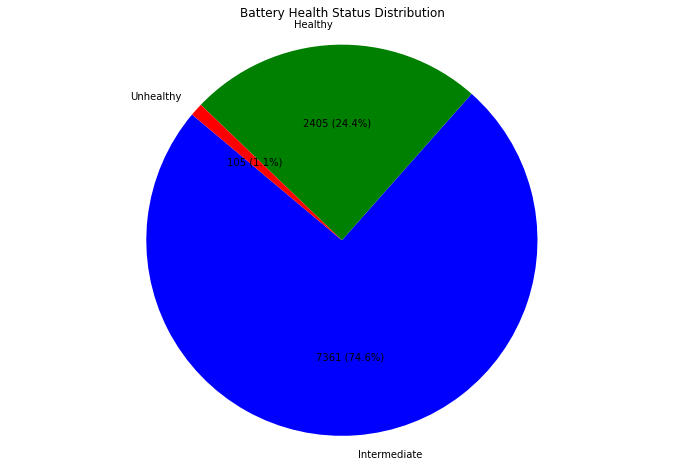

In [12]:
health_status_counts = df_modify['Battery_Health_Status'].value_counts()

# Define colors for each category
colors = ['red' if status == 'Unhealthy' else 'green' if status == 'Healthy' else 'blue' for status in health_status_counts.index]

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(health_status_counts.values, labels=health_status_counts.index, colors=colors, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(health_status_counts.values) / 100, p), startangle=140)
plt.title('Battery Health Status Distribution')
plt.axis('equal')  
plt.show()


In [13]:
df_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data_Point                9871 non-null   int64         
 1   Test_Time(s)              9871 non-null   float64       
 2   Date_Time                 9871 non-null   datetime64[ns]
 3   Step_Time(s)              9871 non-null   float64       
 4   Step_Index                9871 non-null   int64         
 5   Cycle_Index               9871 non-null   int64         
 6   Current(A)                9871 non-null   float64       
 7   Voltage(V)                9871 non-null   float64       
 8   Charge_Capacity(Ah)       9871 non-null   float64       
 9   Discharge_Capacity(Ah)    9871 non-null   float64       
 10  Charge_Energy(Wh)         9871 non-null   float64       
 11  Discharge_Energy(Wh)      9871 non-null   float64       
 12  dV/dt(V/s)          

### Aggregation

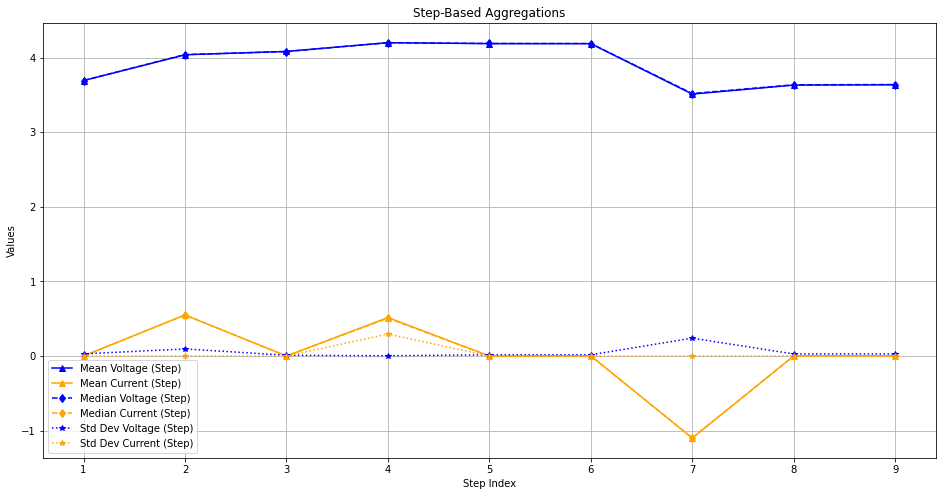

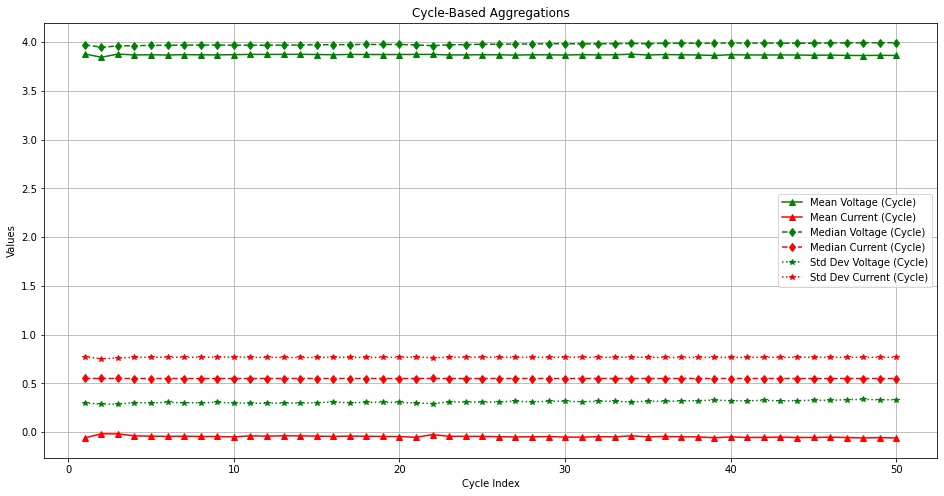

In [14]:
# Step-Based Aggregations
step_statistics = df_modify.groupby('Step_Index')[['Voltage(V)', 'Current(A)']].agg(['mean', 'median', 'std'])

# Cycle-Based Aggregations
cycle_statistics = df_modify.groupby('Cycle_Index')[['Voltage(V)', 'Current(A)']].agg(['mean', 'median', 'std'])

# Visualize Step-Based Aggregations
plt.figure(figsize=(16, 8))
plt.plot(step_statistics.index, step_statistics['Voltage(V)']['mean'], marker='^', label='Mean Voltage (Step)', color='blue')
plt.plot(step_statistics.index, step_statistics['Current(A)']['mean'], marker='^', label='Mean Current (Step)', color='orange')
plt.plot(step_statistics.index, step_statistics['Voltage(V)']['median'], marker='d', label='Median Voltage (Step)', color='blue', linestyle='dashed')
plt.plot(step_statistics.index, step_statistics['Current(A)']['median'], marker='d', label='Median Current (Step)', color='orange', linestyle='dashed')
plt.plot(step_statistics.index, step_statistics['Voltage(V)']['std'], marker='*', label='Std Dev Voltage (Step)', color='blue', linestyle='dotted')
plt.plot(step_statistics.index, step_statistics['Current(A)']['std'], marker='*', label='Std Dev Current (Step)', color='orange', linestyle='dotted')
plt.title('Step-Based Aggregations')
plt.xlabel('Step Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

# Visualize Cycle-Based Aggregations
plt.figure(figsize=(16, 8))
plt.plot(cycle_statistics.index, cycle_statistics['Voltage(V)']['mean'], marker='^', label='Mean Voltage (Cycle)', color='green')
plt.plot(cycle_statistics.index, cycle_statistics['Current(A)']['mean'], marker='^', label='Mean Current (Cycle)', color='red')
plt.plot(cycle_statistics.index, cycle_statistics['Voltage(V)']['median'], marker='d', label='Median Voltage (Cycle)', color='green', linestyle='dashed')
plt.plot(cycle_statistics.index, cycle_statistics['Current(A)']['median'], marker='d', label='Median Current (Cycle)', color='red', linestyle='dashed')
plt.plot(cycle_statistics.index, cycle_statistics['Voltage(V)']['std'], marker='*', label='Std Dev Voltage (Cycle)', color='green', linestyle='dotted')
plt.plot(cycle_statistics.index, cycle_statistics['Current(A)']['std'], marker='*', label='Std Dev Current (Cycle)', color='red', linestyle='dotted')
plt.title('Cycle-Based Aggregations')
plt.xlabel('Cycle Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


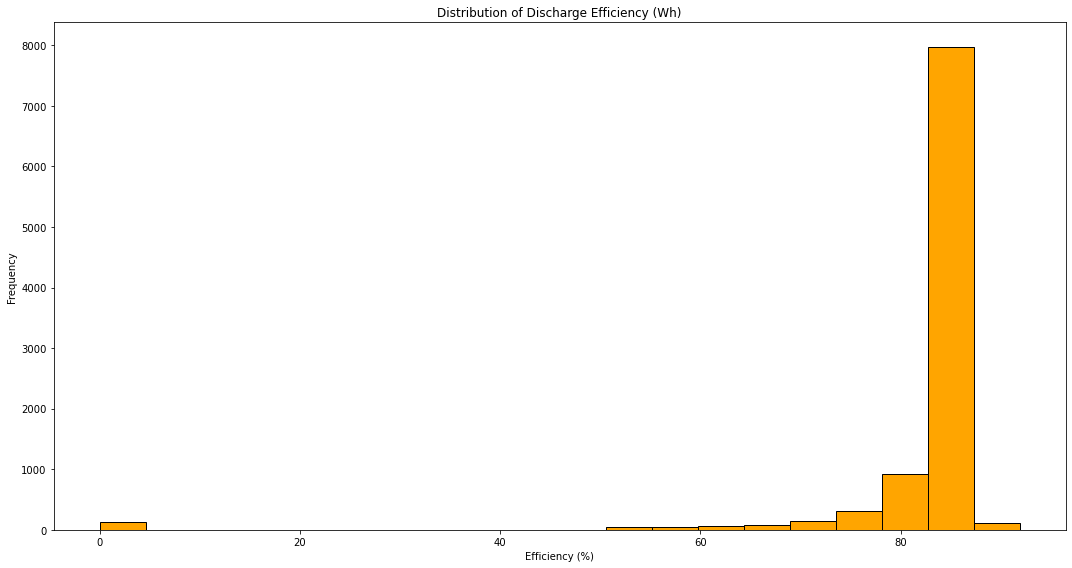

In [15]:
# Discharge Efficiency

charge_energy = df['Charge_Energy(Wh)']
discharge_energy = df['Discharge_Energy(Wh)']

discharge_efficiency = (discharge_energy / charge_energy) * 100
df_modify['Discharge_Efficiency'] = discharge_efficiency

plt.figure(figsize=(15, 8))
plt.hist(discharge_efficiency, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Discharge Efficiency (Wh)')
plt.xlabel('Efficiency (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

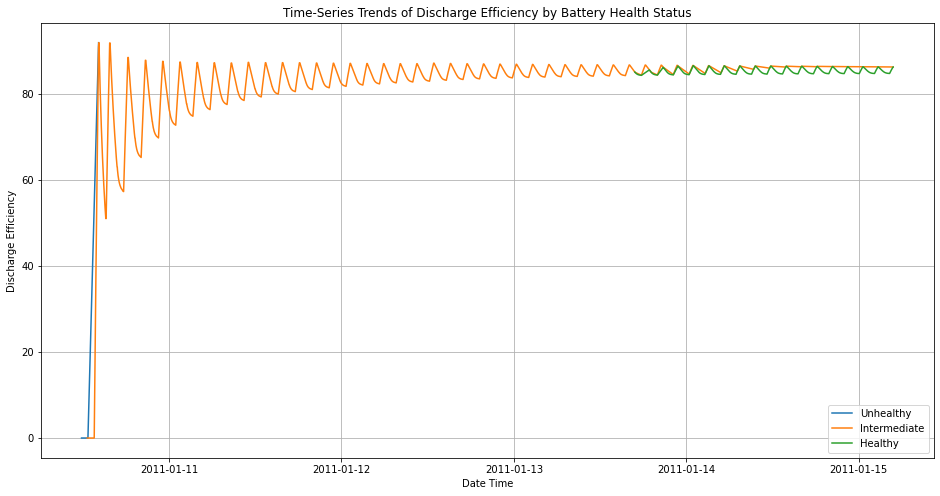

In [16]:
time_series_columns = ['Date_Time', 'Discharge_Efficiency', 'Battery_Health_Status']
time_series_df = df_modify[time_series_columns]

# Set Date_Time as the index
time_series_df.set_index('Date_Time', inplace=True)

# Plot time-series trends of Discharge Efficiency by Battery Health Status
plt.figure(figsize=(16, 8))

for health_status in time_series_df['Battery_Health_Status'].unique():
    subset = time_series_df[time_series_df['Battery_Health_Status'] == health_status]
    plt.plot(subset.index, subset['Discharge_Efficiency'], label=health_status)

plt.title('Time-Series Trends of Discharge Efficiency by Battery Health Status')
plt.xlabel('Date Time')
plt.ylabel('Discharge Efficiency')
plt.legend()
plt.grid()
plt.show()